In [2]:
import pandas as pd
import talib as ta
df=pd.read_csv('./data/000001.csv',index_col=0)
df.rename(columns={'日期':'date', '开盘':'open', '收盘':'close', 
                   '最高':'high', '最低':'low', '成交量':'volume',
                   '成交额':'amount', '振幅':'swing', '涨跌幅':'chg_pct',
                   '涨跌额':'chg_amount', '换手率':'turnover',
                  }, inplace = True)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df=df.set_index('date')
df['dif'], df['dea'], df['macd'] = ta.MACD(df.close, fastperiod=12, slowperiod=26, signalperiod=9)
df

,open,close,high,low,volume,amount,swing,chg_pct,chg_amount,turnover,dif,dea,macd
date,,,,,,,,,,,,,
2015-01-05,10.02,10.04,10.22,9.75,2860436,4.565388e+09,4.74,1.31,0.13,2.91,NaN,NaN,NaN
2015-01-06,9.92,9.87,10.30,9.71,2166421,3.453446e+09,5.88,-1.69,-0.17,2.20,NaN,NaN,NaN
2015-01-07,9.72,9.66,9.91,9.54,1700121,2.634796e+09,3.75,-2.13,-0.21,1.73,NaN,NaN,NaN
2015-01-08,9.68,9.30,9.73,9.26,1407714,2.128003e+09,4.87,-3.73,-0.36,1.43,NaN,NaN,NaN
2015-01-09,9.26,9.39,9.94,9.13,2508500,3.835378e+09,8.71,0.97,0.09,2.55,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-24,14.92,15.20,15.31,14.81,1002360,1.518870e+09,3.33,1.33,0.20,0.52,-0.343682,-0.477993,0.134311
2022-03-25,15.15,14.98,15.25,14.82,742933,1.116355e+09,2.83,-1.45,-0.22,0.38,-0.308374,-0.444069,0.135695
2022-03-28,14.80,14.85,15.05,14.63,727137,1.078327e+09,2.80,-0.87,-0.13,0.37,-0.287567,-0.412769,0.125201


In [3]:
import pandas as pd

df_base=pd.read_csv('./data/000001.csv',index_col=0)
df_base.rename(columns={'日期':'date'}, inplace = True)
df_base['date'] = pd.to_datetime(df_base['date'], format='%Y-%m-%d')
df_base=df_base['date']


df=pd.read_csv('./data/605499.csv',index_col=0)
df.rename(columns={'日期':'date', '开盘':'open', '收盘':'close', 
                   '最高':'high', '最低':'low', '成交量':'volume',
                   '成交额':'amount', '振幅':'swing', '涨跌幅':'chg_pct',
                   '涨跌额':'chg_amount', '换手率':'turnover',
                  }, inplace = True)

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df=pd.merge(df_base,df,on=['date'],how='outer')
df

,date,open,close,high,low,volume,amount,swing,chg_pct,chg_amount,turnover
0,2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1757,2022-03-24,141.00,139.90,141.10,137.51,7589.0,105421161.0,2.52,-1.62,-2.30,1.90
1758,2022-03-25,140.65,133.94,140.65,132.00,13464.0,182664485.0,6.18,-4.26,-5.96,3.37
1759,2022-03-28,133.50,131.79,133.90,127.23,10782.0,140779560.0,4.98,-1.61,-2.15,2.69
1760,2022-03-29,131.70,130.23,133.76,129.75,6226.0,81915350.0,3.04,-1.18,-1.56,1.56


In [16]:
import backtrader as bt
import pandas as pd
import math
import talib as ta
import numpy as np
from backtrader.feeds import PandasData
from datetime import datetime
import akshare as ak

class Addmoredata(PandasData):
    lines = ('dif','dea','macd',)
    params = (('dif',10),('dea',11),('macd',12),)

class TestStrategy(bt.Strategy):
    def __init__(self):
        df_base=pd.read_csv('./data/000001.csv',index_col=0)
        df_base.rename(columns={'日期':'date'}, inplace = True)
        df_base['date'] = pd.to_datetime(df_base['date'], format='%Y-%m-%d')
        df_base=df_base['date']
        self.df_base=df_base
        
    def next(self):   
        today=self.datas[0].datetime.date()
        for data in self.datas:
            symbol=data._name
            close=data.close[0]
            print("今天是："+str(today)+"，股票"+symbol
              +"，MACD是："+str(data.macd[0]))

cerebro = bt.Cerebro()

start=datetime.strptime('20150101', "%Y%m%d")
end=datetime.strptime('20220330', "%Y%m%d")

index_stock_cons_df = ak.index_stock_cons(symbol="000300")
symbol_list=index_stock_cons_df['品种代码'].tolist()
for symbol in symbol_list[:3]:
    df=pd.read_csv('./data/'+symbol+'.csv',index_col=0)
    df.rename(columns={'日期':'date', '开盘':'open', '收盘':'close', 
                       '最高':'high', '最低':'low', '成交量':'volume',
                       '成交额':'amount', '振幅':'swing', '涨跌幅':'chg_pct',
                       '涨跌额':'chg_amount', '换手率':'turnover',
                      }, inplace = True)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df=pd.merge(df_base,df,on=['date'],how='outer')
    df=df.set_index('date') 
    df['dif'], df['dea'], df['macd'] = ta.MACD(df.close, fastperiod=12, slowperiod=26, signalperiod=9)
    df=df.fillna(0)
    print(df)
    #data = bt.feeds.PandasData(dataname=df)
    data=Addmoredata(dataname=df,fromdate=start,todate=end,sessionstart=start)
    cerebro.adddata(data,name=symbol)

cerebro.addstrategy(TestStrategy)
results = cerebro.run()

              open   close    high    low   volume       amount  swing  \
date                                                                     
2015-01-05    0.00    0.00    0.00   0.00      0.0          0.0   0.00   
2015-01-06    0.00    0.00    0.00   0.00      0.0          0.0   0.00   
2015-01-07    0.00    0.00    0.00   0.00      0.0          0.0   0.00   
2015-01-08    0.00    0.00    0.00   0.00      0.0          0.0   0.00   
2015-01-09    0.00    0.00    0.00   0.00      0.0          0.0   0.00   
...            ...     ...     ...    ...      ...          ...    ...   
2022-03-24  101.08   99.49  101.08  97.60  37421.0  369974496.0   3.44   
2022-03-25   99.41   98.10  100.08  97.20  28289.0  279058784.0   2.89   
2022-03-28   96.89   95.60   97.90  95.00  24161.0  231416848.0   2.96   
2022-03-29   97.50   94.68   97.50  93.59  17180.0  163416202.0   4.09   
2022-03-30   95.12  104.15  104.15  94.66  34442.0  346955952.0  10.02   

            chg_pct  chg_amount  turn

今天是：2016-09-09，股票002791，MACD是：-0.23289555034759096
今天是：2016-09-09，股票603260，MACD是：0.0
今天是：2016-09-09，股票002459，MACD是：0.0
今天是：2016-09-12，股票002791，MACD是：-0.2948052173541884
今天是：2016-09-12，股票603260，MACD是：0.0
今天是：2016-09-12，股票002459，MACD是：0.0
今天是：2016-09-13，股票002791，MACD是：-0.3178756064664812
今天是：2016-09-13，股票603260，MACD是：0.0
今天是：2016-09-13，股票002459，MACD是：0.0
今天是：2016-09-14，股票002791，MACD是：-0.33253734377938843
今天是：2016-09-14，股票603260，MACD是：0.0
今天是：2016-09-14，股票002459，MACD是：0.0
今天是：2016-09-19，股票002791，MACD是：-0.2848808211565562
今天是：2016-09-19，股票603260，MACD是：0.0
今天是：2016-09-19，股票002459，MACD是：0.0
今天是：2016-09-20，股票002791，MACD是：-0.2280931252387638
今天是：2016-09-20，股票603260，MACD是：0.0
今天是：2016-09-20，股票002459，MACD是：0.0
今天是：2016-09-21，股票002791，MACD是：-0.16612469137170305
今天是：2016-09-21，股票603260，MACD是：0.0
今天是：2016-09-21，股票002459，MACD是：0.0
今天是：2016-09-22，股票002791，MACD是：-0.10952251699528981
今天是：2016-09-22，股票603260，MACD是：0.0
今天是：2016-09-22，股票002459，MACD是：0.0
今天是：2016-09-23，股票002791，MACD是：-0.06283042547606676
今

今天是：2018-05-08，股票002791，MACD是：-0.04771634052088258
今天是：2018-05-08，股票603260，MACD是：0.4765877323884493
今天是：2018-05-08，股票002459，MACD是：0.0
今天是：2018-05-09，股票002791，MACD是：-0.010514579977389804
今天是：2018-05-09，股票603260，MACD是：0.47640033456039843
今天是：2018-05-09，股票002459，MACD是：0.0
今天是：2018-05-10，股票002791，MACD是：0.04123932435604405
今天是：2018-05-10，股票603260，MACD是：0.39243660043354356
今天是：2018-05-10，股票002459，MACD是：0.0
今天是：2018-05-11，股票002791，MACD是：0.08335279659422723
今天是：2018-05-11，股票603260，MACD是：0.3181828077364648
今天是：2018-05-11，股票002459，MACD是：0.0
今天是：2018-05-14，股票002791，MACD是：0.09086095490815793
今天是：2018-05-14，股票603260，MACD是：0.22510254966612875
今天是：2018-05-14，股票002459，MACD是：0.0
今天是：2018-05-15，股票002791，MACD是：0.10607279430402833
今天是：2018-05-15，股票603260，MACD是：0.14756295349507376
今天是：2018-05-15，股票002459，MACD是：0.0
今天是：2018-05-16，股票002791，MACD是：0.10975772132867428
今天是：2018-05-16，股票603260，MACD是：0.10710490668183037
今天是：2018-05-16，股票002459，MACD是：0.0
今天是：2018-05-17，股票002791，MACD是：0.08854370374937093
今天是：2018-05

今天是：2020-02-06，股票603260，MACD是：-0.595407695018717
今天是：2020-02-06，股票002459，MACD是：0.0
今天是：2020-02-07，股票002791，MACD是：-0.15834994446430883
今天是：2020-02-07，股票603260，MACD是：-0.5519576392558542
今天是：2020-02-07，股票002459，MACD是：0.0
今天是：2020-02-10，股票002791，MACD是：-0.04662886110616293
今天是：2020-02-10，股票603260，MACD是：-0.4469809130291913
今天是：2020-02-10，股票002459，MACD是：0.0
今天是：2020-02-11，股票002791，MACD是：0.2753918140858742
今天是：2020-02-11，股票603260，MACD是：-0.31749740483703126
今天是：2020-02-11，股票002459，MACD是：0.0
今天是：2020-02-12，股票002791，MACD是：0.4672940172797744
今天是：2020-02-12，股票603260，MACD是：-0.09320194962053308
今天是：2020-02-12，股票002459，MACD是：0.0
今天是：2020-02-13，股票002791，MACD是：0.629695082034412
今天是：2020-02-13，股票603260，MACD是：0.09026773217450657
今天是：2020-02-13，股票002459，MACD是：0.0
今天是：2020-02-14，股票002791，MACD是：0.7776967561515811
今天是：2020-02-14，股票603260，MACD是：0.14898035846102853
今天是：2020-02-14，股票002459，MACD是：0.0
今天是：2020-02-17，股票002791，MACD是：0.7903558258558716
今天是：2020-02-17，股票603260，MACD是：0.21095780291759403
今天是：2020-02-17，

今天是：2021-09-01，股票002791，MACD是：-5.600676651173861
今天是：2021-09-01，股票603260，MACD是：7.377696444970805
今天是：2021-09-01，股票002459，MACD是：0.0
今天是：2021-09-02，股票002791，MACD是：-5.751932847507707
今天是：2021-09-02，股票603260，MACD是：6.498946374273963
今天是：2021-09-02，股票002459，MACD是：0.0
今天是：2021-09-03，股票002791，MACD是：-5.832988442311969
今天是：2021-09-03，股票603260，MACD是：5.052191607966002
今天是：2021-09-03，股票002459，MACD是：0.0
今天是：2021-09-06，股票002791，MACD是：-5.05222652704567
今天是：2021-09-06，股票603260，MACD是：2.2154468170974795
今天是：2021-09-06，股票002459，MACD是：0.0
今天是：2021-09-07，股票002791，MACD是：-4.182542634012254
今天是：2021-09-07，股票603260，MACD是：0.8075394658157897
今天是：2021-09-07，股票002459，MACD是：0.0
今天是：2021-09-08，股票002791，MACD是：-3.2912670441578626
今天是：2021-09-08，股票603260，MACD是：-0.2627163173746254
今天是：2021-09-08，股票002459，MACD是：0.0
今天是：2021-09-09，股票002791，MACD是：-2.730727305919924
今天是：2021-09-09，股票603260，MACD是：-1.2745953927454252
今天是：2021-09-09，股票002459，MACD是：0.0
今天是：2021-09-10，股票002791，MACD是：-2.0541170169539864
今天是：2021-09-10，股票603260，MAC

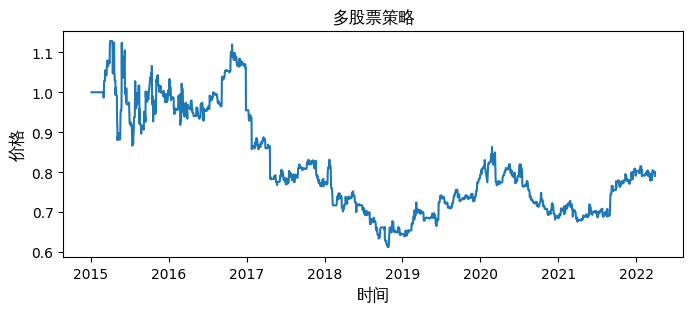

In [57]:
from backtrader.feeds import PandasData
from datetime import datetime
import akshare as ak

class Addmoredata(PandasData):
    lines = ('dif','dea','macd',)
    params = (('dif',10),('dea',11),('macd',12),)

class TestStrategy(bt.Strategy):
    def __init__(self):
        df_base=pd.read_csv('./data/000001.csv',index_col=0)
        df_base.rename(columns={'日期':'date'}, inplace = True)
        df_base['date'] = pd.to_datetime(df_base['date'], format='%Y-%m-%d')
        df_base=df_base['date']
        self.df_base=df_base
        
    def next(self):   
        today=self.datas[0].datetime.date()
        weekday=today.weekday()+1
        #周二买入十支，每支占总资金1/10
        if weekday==1:
            count=0
            money=self.broker.get_cash()/10
            for data in self.datas:
                symbol=data._name
                if data.macd[0]>0.05 and data.macd[0]<0.2 and not math.isnan(data.close[0]) and data.close[0]>0:
#                     print(self.broker.get_cash())
#                     print(data.close[0])
                    size=int(money/data.close[0]/100)*100
                    self.order = self.buy(data=data, size=size) 
#                     print(str(today)+","+symbol+','+str(size))
                    count=count+1
                if count==10:
                    break
            
        elif weekday==4:
            for data in self.datas:
                if self.getposition(data).size > 0:
                    self.order=self.sell(data=data,size=self.getposition(data).size)

    

cerebro = bt.Cerebro()

start=datetime.strptime('20150101', "%Y%m%d")
end=datetime.strptime('20220330', "%Y%m%d")


df_base=pd.read_csv('./data/000001.csv',index_col=0)
df_base.rename(columns={'日期':'date'}, inplace = True)
df_base['date'] = pd.to_datetime(df_base['date'], format='%Y-%m-%d')
df_base=df_base['date']
        

symbol_list=index_stock_cons_df['品种代码'].tolist()
for symbol in symbol_list[:300]:
    df=pd.read_csv('./data/'+symbol+'.csv',index_col=0)
    df.rename(columns={'日期':'date', '开盘':'open', '收盘':'close', 
                       '最高':'high', '最低':'low', '成交量':'volume',
                       '成交额':'amount', '振幅':'swing', '涨跌幅':'chg_pct',
                       '涨跌额':'chg_amount', '换手率':'turnover',
                      }, inplace = True)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df=pd.merge(df_base,df,on=['date'],how='outer')
    df=df.set_index('date') 
    df['dif'], df['dea'], df['macd'] = ta.MACD(df.close, fastperiod=12, slowperiod=26, signalperiod=9)
    
    
    df=df.fillna(0)
    data=Addmoredata(dataname=df,fromdate=start)
    cerebro.adddata(data,name=symbol)

cerebro.broker.setcash(100000.0)
cerebro.addstrategy(TestStrategy)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name = "TimeReturn")
results = cerebro.run()
strat = results[0] 
portvalue = cerebro.broker.getvalue()
returns=pd.Series(strat.analyzers.TimeReturn.get_analysis())

returns=returns.dropna()

my_pct=[]
bench_pct=[]

my_pct=returns+1
my_pct=my_pct.cumprod()


import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc", size=12) 

plt.figure(dpi=100,figsize=(8,3))
plt.title(u"多股票策略",fontproperties=font_set)
plt.xlabel(u"时间",fontproperties=font_set)
plt.ylabel(u"价格",fontproperties=font_set)
plt.plot(my_pct)

plt.show()

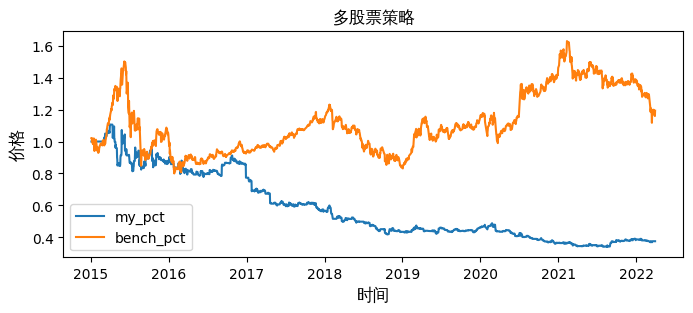

In [58]:
from backtrader.feeds import PandasData
from datetime import datetime
import akshare as ak

class Addmoredata(PandasData):
    lines = ('dif','dea','macd',)
    params = (('dif',10),('dea',11),('macd',12),)

class TestStrategy(bt.Strategy):
    def __init__(self):
        df_base=pd.read_csv('./data/000001.csv',index_col=0)
        df_base.rename(columns={'日期':'date'}, inplace = True)
        df_base['date'] = pd.to_datetime(df_base['date'], format='%Y-%m-%d')
        df_base=df_base['date']
        self.df_base=df_base
        
    def next(self):   
        today=self.datas[0].datetime.date()
        weekday=today.weekday()+1
        #周二买入十支，每支占总资金1/10
        if weekday==1:
            count=0
            money=self.broker.get_cash()/10
            for data in self.datas:
                symbol=data._name
                if(symbol=='benchmark'):
                    break
                if data.macd[0]>0.05 and data.macd[0]<0.2 and not math.isnan(data.close[0]) and data.close[0]>0:
                    size=int(money/data.close[0]/100)*100
                    self.order = self.buy(data=data, size=size) 
                    count=count+1
                if count==10:
                    break
            
        elif weekday==4:
            for data in self.datas:
                if self.getposition(data).size > 0:
                    self.order=self.sell(data=data,size=self.getposition(data).size)
                    #print('sell')

    

cerebro = bt.Cerebro()

start=datetime.strptime('20150101', "%Y%m%d")
end=datetime.strptime('20220330', "%Y%m%d")


df_base=pd.read_csv('./data/000001.csv',index_col=0)
df_base.rename(columns={'日期':'date'}, inplace = True)
df_base['date'] = pd.to_datetime(df_base['date'], format='%Y-%m-%d')
df_base=df_base['date']
        

symbol_list=index_stock_cons_df['品种代码'].tolist()
for symbol in symbol_list[:300]:
    df=pd.read_csv('./data/'+symbol+'.csv',index_col=0)
    df.rename(columns={'日期':'date', '开盘':'open', '收盘':'close', 
                       '最高':'high', '最低':'low', '成交量':'volume',
                       '成交额':'amount', '振幅':'swing', '涨跌幅':'chg_pct',
                       '涨跌额':'chg_amount', '换手率':'turnover',
                      }, inplace = True)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df=pd.merge(df_base,df,on=['date'],how='outer')
    df=df.set_index('date') 
    df['dif'], df['dea'], df['macd'] = ta.MACD(df.close, fastperiod=12, slowperiod=26, signalperiod=9)
    
    
    df=df.fillna(0)
    #data = bt.feeds.PandasData(dataname=df)
    data=Addmoredata(dataname=df,fromdate=start)
    cerebro.adddata(data,name=symbol)

    
    
hs300 = ak.index_zh_a_hist(symbol="000300", period="daily", start_date="20150101", end_date="20220330")    
hs300.rename(columns={'日期':'date', '开盘':'open', '收盘':'close', 
                       '最高':'high', '最低':'low', '成交量':'volume',
                       '成交额':'amount', '振幅':'swing', '涨跌幅':'chg_pct',
                       '涨跌额':'chg_amount', '换手率':'turnover',
                      }, inplace = True)
hs300['date'] = pd.to_datetime(hs300['date'], format='%Y-%m-%d')
#hs300=pd.merge(df_base,df,on=['date'],how='outer')
hs300=hs300.set_index('date') 
#print(hs300)

 
benchFeed = bt.feeds.PandasData(dataname=hs300)   
cerebro.adddata(benchFeed,name='benchmark')    

cerebro.broker.setcash(100000.0)
cerebro.addstrategy(TestStrategy)


cerebro.broker.setcommission(commission=0.002)
cerebro.addanalyzer(bt.analyzers.SharpeRatio,_name='SharpeRatio',timeframe=bt.TimeFrame.Days)
cerebro.addanalyzer(bt.analyzers.DrawDown,_name='DW')
cerebro.addanalyzer(bt.analyzers.SQN,_name='SQN')
cerebro.addanalyzer(bt.analyzers.Transactions,_name='T')
cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='AnnualReturn') # annual return
cerebro.addanalyzer(bt.analyzers.Returns, _name = "RE")
cerebro.addobserver(bt.observers.Benchmark, data = benchFeed, timeframe = bt.TimeFrame.NoTimeFrame)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name = "TimeReturn")
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name = "TimeReturnBenchMark", data = benchFeed)
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name = "TA")

results = cerebro.run()
strat = results[0] 

portvalue = cerebro.broker.getvalue()
returns=pd.Series(strat.analyzers.TimeReturn.get_analysis())
returns=returns.dropna()
benchReturns=pd.Series(strat.analyzers.TimeReturnBenchMark.get_analysis())

my_pct=[]
bench_pct=[]

my_pct=returns+1
my_pct=my_pct.cumprod()
bench_pct=benchReturns+1
bench_pct=bench_pct.cumprod()
 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc", size=12) 

plt.figure(dpi=100,figsize=(8,3))
plt.title(u"多股票策略",fontproperties=font_set)
plt.xlabel(u"时间",fontproperties=font_set)
plt.ylabel(u"价格",fontproperties=font_set)
plt.plot(my_pct)
plt.plot(bench_pct)
plt.legend([u'my_pct','bench_pct'])
 
plt.show()


In [56]:
review={}
trade_info = strat.analyzers.TA.get_analysis()
review['sharperatio']=strat.analyzers.SharpeRatio.get_analysis()['sharperatio']
review['drawdown']=strat.analyzers.DW.get_analysis()['drawdown']
review['sqn']=strat.analyzers.SQN.get_analysis()['sqn']
review['annual_return']=strat.analyzers.AnnualReturn.get_analysis()
review["portvalue"]=round(portvalue,2)
review["rtot"] = strat.analyzers.RE.get_analysis()["rtot"]
review["rnorm"] = strat.analyzers.RE.get_analysis()["rnorm"]
review["trade_num"] = 0
review["win"] = 0  
try:
    total_trade_num = trade_info["total"]["total"]
    if total_trade_num > 1:
        win_num = trade_info["won"]["total"]
        lost_num = trade_info["lost"]["total"]
        review["trade_num"] = total_trade_num
        review["win"] = win_num/total_trade_num    
except Exception as e:
    print(e)
    
import json
print(json.dumps(review, indent=1))


{
 "sharperatio": -0.02052501824894213,
 "drawdown": 38.43283130197519,
 "sqn": -0.9094485591369791,
 "annual_return": {
  "2015": 0.015992959999999945,
  "2016": -0.011713053602261159,
  "2017": -0.05026454831485683,
  "2018": -0.11758409765409095,
  "2019": 0.04977614152965293,
  "2020": -0.07966746273989078,
  "2021": -0.03443010738827512,
  "2022": 0.001184826395481231
 },
 "portvalue": 78593.96,
 "rtot": -0.24087530884211086,
 "rnorm": -0.03386317803622668,
 "trade_num": 1004,
 "win": 0.450199203187251
}
